Plot confusion matrix

In [1]:
# !pip install scikit-learn
# !pip install matplotlib_venn 

In [2]:
import json
from itertools import combinations
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

from ospo_stats.github.crawl import discover_repos

In [3]:
keywords = ["uw-madison", "madison", "wisconsin", "wisc.edu"]

In [4]:
for keyword in keywords:
    repos = discover_repos(keyword, push_to_turso=False)

Parse to sets

In [34]:
data_path = Path("./data")

def get_url(json_file: Path) -> set:
    """Get url from raw json."""

    with open(json_file, "r") as f:
        repos = json.load(f)

    return set([repo["repo"]['url'] for repo in repos])

data = {k : set() for k in keywords}
for keyword in keywords:
    print(keyword)
    for x in data_path.glob(f"*_{keyword}_*.json"):
        data[keyword].update(get_url(x))

uw-madison
madison
wisconsin
wisc.edu


Additional Venn in one diagram

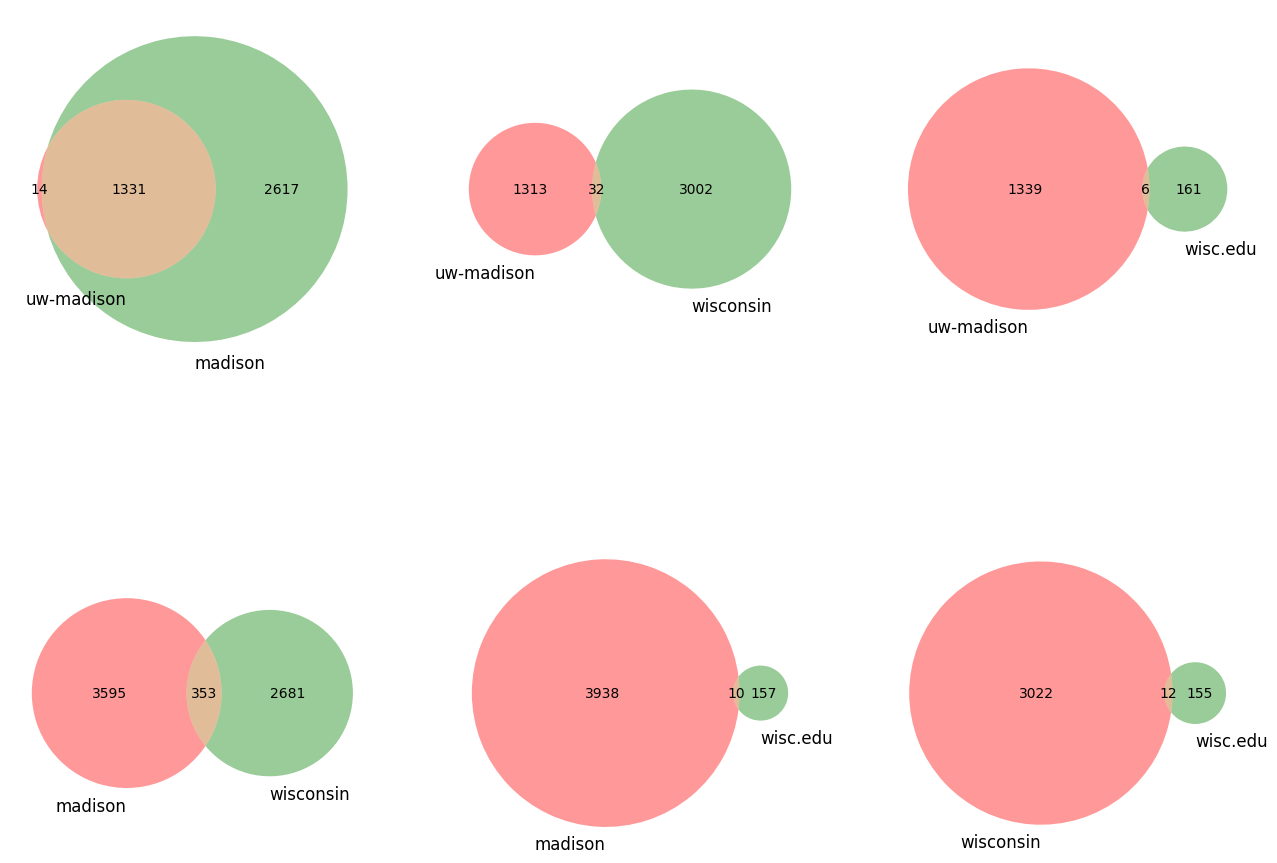

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
pairs = list(combinations(keywords, 2))

for i, pair in enumerate(pairs):
    ax = axes[i // 3, i % 3]
    venn2([data[k] for k in pair], pair, ax=ax)